In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

sns.set()

from scipy import stats

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [3]:
raw_data = pd.read_csv("../../../data/2.01. Admittance.csv")
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
data = raw_data.copy()
data["Admitted"] = data["Admitted"].map({"Yes": 1, "No": 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


従属変数と独立変数(SAT)を定義

In [5]:
y = data["Admitted"]
x1 = data["SAT"]

散布図を表示

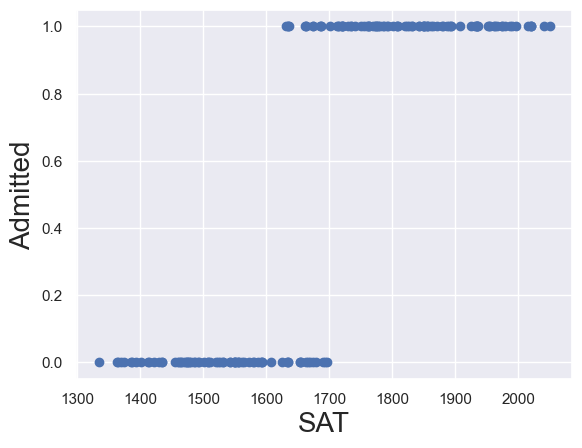

In [6]:
plt.scatter(x1, y, color="C0")
plt.xlabel("SAT", fontsize=20)
plt.ylabel("Admitted", fontsize=20)
plt.show()

単回帰分析を実行し、回帰直線を表示

/var/folders/k8/xq9_8lkd7bqc5dx7rlkdm0qr0000gn/T/ipykernel_99785/750067244.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x1 * results_lin.params[1] + results_lin.params[0]


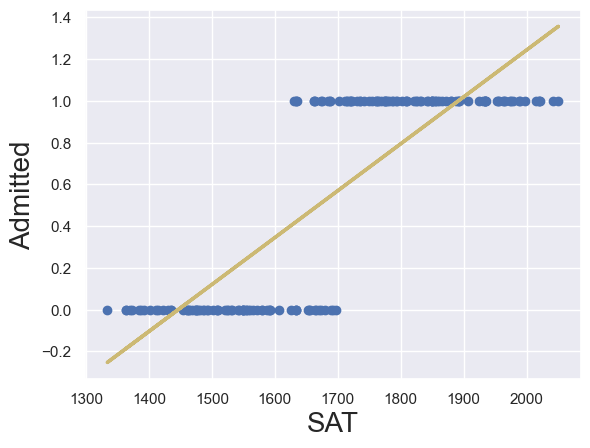

In [8]:
x = sm.add_constant(x1)
reg_log = sm.OLS(y, x)
results_lin = reg_log.fit()

plt.scatter(x1, y, color="C0")
y_hat = x1 * results_lin.params[1] + results_lin.params[0]
plt.plot(x1, y_hat, lw=2.5, color="C8")
plt.xlabel("SAT", fontsize=20)
plt.ylabel("Admitted", fontsize=20)
plt.show()

直線だと意味不明、単回帰は使えないので曲線にしてみる
- 回帰の実装,線形回帰では最小二乗法を用いたが今回が、ロジットを使う

In [12]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


まとめを表示

In [19]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:               7.410e-11
Time:                        15:55:39   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

In [20]:
x0 = np.ones(168)
reg_log = sm.Logit(y, x0)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:               7.410e-11
Time:                        15:55:51   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

In [ ]:
def f(x, b0, b1):
    return np.array(np.exp(b0 + x * b1) / (1 + np.exp(b0 + x * b1)))


f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color="C0")
plt.xlabel("SAT", fontsize=20)
plt.ylabel("Admitted", fontsize=20)
plt.plot(x_sorted, f_sorted, color="C8")
plt.show()